In [173]:
#import data 

import pandas as pd
bank = pd.read_csv("BankChurners.csv")

In [123]:
bank.shape

(10127, 23)

In [124]:
pd.set_option("display.max_columns", None)

In [125]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [174]:
# below columns are not needed

bank = bank.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
                 ,"CLIENTNUM"],
                axis=1)

In [127]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [128]:
bank.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


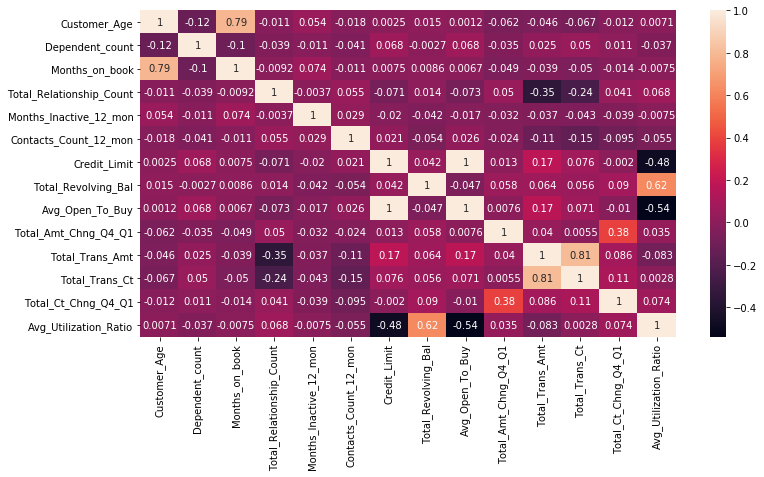

In [129]:
#heatmap for correlation 

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (12,6))

sns.heatmap(bank.corr(),annot = True)

In [130]:
#checking null values

bank.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [131]:
bank["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

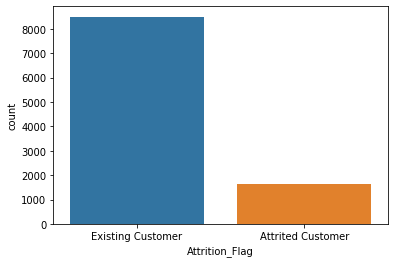

In [132]:
# data is severly imbalanced so we will apply SMOTE to balance it

sns.countplot("Attrition_Flag",data=bank)

In [175]:
#replace Attrition_Flag to numerical values

bank["Attrition_Flag"].replace(to_replace = ["Existing Customer","Attrited Customer"],value=[1,0],inplace=True)

In [134]:
bank["Attrition_Flag"].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

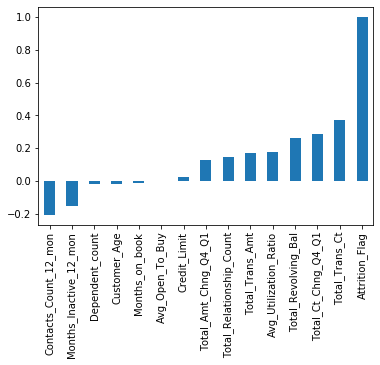

In [135]:
#checking correlation of attrition_flag(decides whether customer kept the credit card) with other columns

bank.corr()["Attrition_Flag"].sort_values().plot(kind="bar")

In [136]:
#exploring Income category column

bank["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

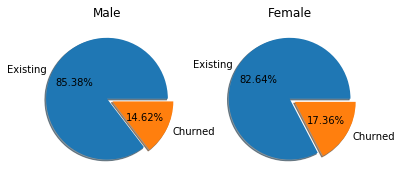

In [137]:
#EDA for Gender column

size_m = bank.loc[bank["Gender"] == "M"]["Attrition_Flag"].value_counts()
size_f = bank.loc[bank["Gender"] == "F"]["Attrition_Flag"].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(size_m,shadow=True,explode=[0,0.1],labels=["Existing","Churned"],autopct='%1.2f%%')
ax1.title.set_text("Male")
ax2.pie(size_f,shadow=True,explode=[0,0.1],labels=["Existing","Churned"],autopct='%1.2f%%')
ax2.title.set_text("Female")
plt.show()


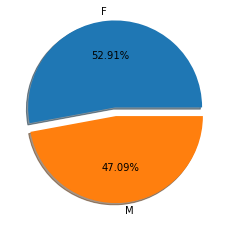

In [138]:
# Male and female ratio is not equally uniformed so we can ignore Male,Female churned ratio too

size = bank["Gender"].value_counts()
plt.pie(size,shadow=True,labels=size.index.values,autopct='%1.2f%%',explode=[0.1,0])
plt.show()


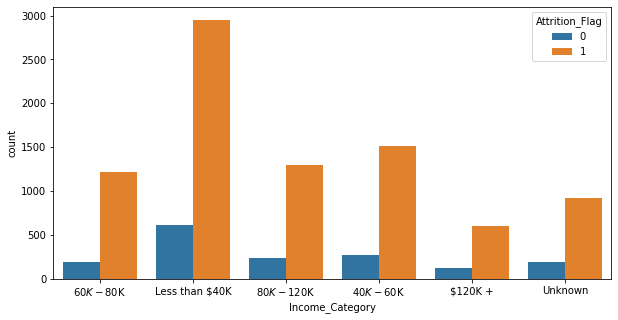

In [139]:
#EDA for Income category

plt.figure(figsize=(10,5))
sns.countplot("Income_Category",hue="Attrition_Flag",data=bank)

In [140]:
bank.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [176]:
# onehot encoding for categorical columns

bank = pd.get_dummies(data=bank,columns=["Gender","Education_Level","Marital_Status","Income_Category",
                                         "Card_Category"]
                      ,drop_first=True)

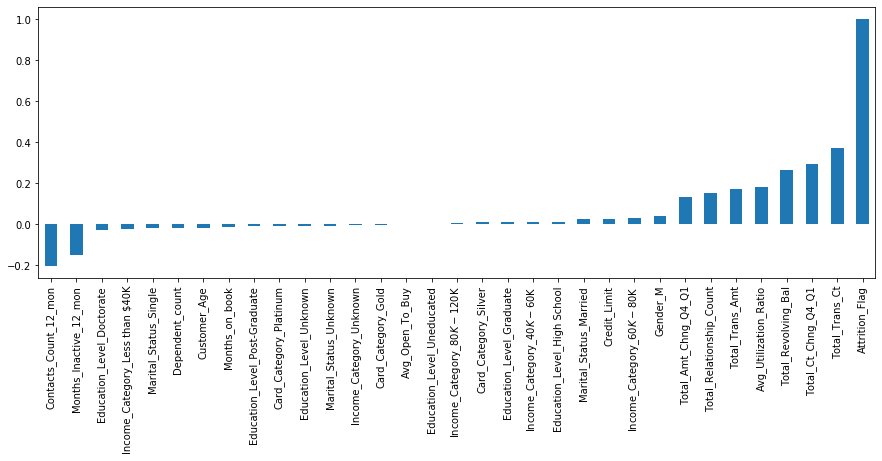

In [142]:
#checking correlation of attrition_flag with other fields
plt.figure(figsize=(15,5))
bank.corr()["Attrition_Flag"].sort_values().plot(kind="bar")

In [177]:
# divide into features and labels

X = bank.drop("Attrition_Flag",axis=1)

In [178]:
X.shape

(10127, 32)

In [179]:
y= bank["Attrition_Flag"]

In [180]:
y.shape

(10127,)

In [181]:
# do train test split for features and labels

from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [183]:
# checking training sample numbers for Label ( attrition flag)
from collections import Counter
print(Counter(y_train))

Counter({1: 5963, 0: 1125})


In [184]:
# perform Standard Scaling and SMOTE to handle imbalance between data 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [185]:
# checking training sample numbers for Label ( attrition flag) after SMOTE ( they are equal )


from collections import Counter
print(Counter(y_train))

Counter({1: 5963, 0: 5963})


In [152]:
#perform grid Search CV to find best hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param = {"n_estimators": [10,50,100,200],"max_features" : ["auto", "sqrt", "log2"],
         "criterion" : ["gini", "entropy"]}

In [153]:
# add estimator and perform grid search CV

grid = GridSearchCV(RandomForestClassifier(),param_grid=param,verbose=2)

In [154]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_features=auto, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=50, total=   0.7s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=50, total=   0.6s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=50, total=   0.6s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............

[CV]  criterion=gini, max_features=log2, n_estimators=200, total=   2.5s
[CV] criterion=entropy, max_features=auto, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_features=auto, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_features=auto, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_features=auto, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=10, total=   0.2s
[CV] criterion=entropy, max_features=auto, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_features=auto, n_estimators=50 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=50, total=   0.7s
[CV] criterion=entropy, max_features=auto, n_estima

[CV]  criterion=entropy, max_features=log2, n_estimators=200, total=   2.9s
[CV] criterion=entropy, max_features=log2, n_estimators=200 ..........
[CV]  criterion=entropy, max_features=log2, n_estimators=200, total=   2.8s
[CV] criterion=entropy, max_features=log2, n_estimators=200 ..........
[CV]  criterion=entropy, max_features=log2, n_estimators=200, total=   2.8s
[CV] criterion=entropy, max_features=log2, n_estimators=200 ..........
[CV]  criterion=entropy, max_features=log2, n_estimators=200, total=   2.8s
[CV] criterion=entropy, max_features=log2, n_estimators=200 ..........
[CV]  criterion=entropy, max_features=log2, n_estimators=200, total=   2.8s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.5min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [155]:
grid.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}

In [156]:
grid_pred = grid.predict(X_test)

In [157]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

[[ 443   59]
 [  68 2469]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       502
           1       0.98      0.97      0.97      2537

    accuracy                           0.96      3039
   macro avg       0.92      0.93      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [21]:
#model = RandomForestClassifier(n_estimators=200)
#model.fit(X_train,y_train)
#model.feature_importances_

In [24]:
#y_pred = model.predict(X_test)

In [158]:
#confusion_matrix(y_test,y_pred)
#print(classification_report(y_test,y_pred))

In [171]:
# Trying Naive bayes

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [172]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 377  125]
 [ 482 2055]]
              precision    recall  f1-score   support

           0       0.44      0.75      0.55       502
           1       0.94      0.81      0.87      2537

    accuracy                           0.80      3039
   macro avg       0.69      0.78      0.71      3039
weighted avg       0.86      0.80      0.82      3039



In [186]:
# trying Support vector machines

from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [187]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 421   81]
 [ 188 2349]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       502
           1       0.97      0.93      0.95      2537

    accuracy                           0.91      3039
   macro avg       0.83      0.88      0.85      3039
weighted avg       0.92      0.91      0.91      3039



In [188]:
#As we see Random Forrest classifier has highest accuracy and result will change everytime as SMOTE will choose different
#samples